NEURAL NETWORK FOR HANDWRITTEN NUMBERS

Objective:
To classify handwritten digits using a simple neural network containing only input and output layers. We will then add a hidden layer and see how the performance of the model improves.
Data:
Each image is a two dimensional array with a 28 by 28 grid, the number is white and blank splace is black.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Load data from keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

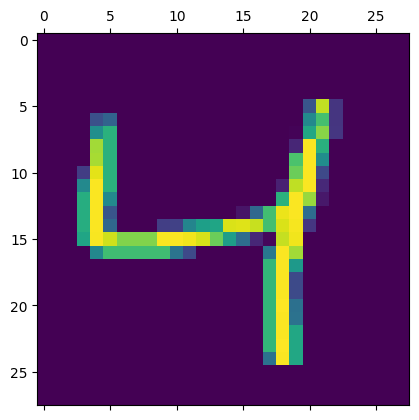

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

We need to flatten the 28 by 28 array for each of the images and convert them to a single dimension array 
Each image will now be a 784 Row by 1 Column array (28*28=784)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now let's create a simple neural network


In [31]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', # SGD Stochastic Gradient Descent - another optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4723 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9257


To increase accuracy we can scale the values such that they are bound between 0 and 1
Recall black is 0 and white is 255, so currently the range is very broad (0-255)
To bind the numbers between 0 and 1 we divide all the numbers in the array by 255

Let's evaluate the accuracy on a test dataset

In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9254


[0.2663114368915558, 0.9254000186920166]

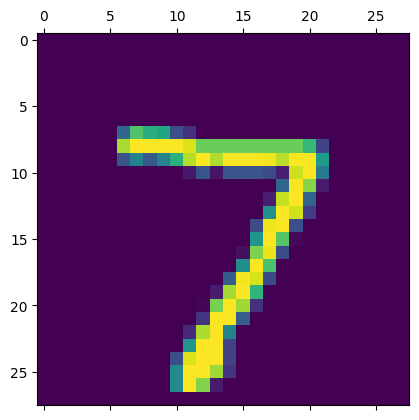

In [18]:
#Let's see what the first test image is
plt.matshow(X_test[0])

In [19]:
#Let's see if the prediction works, will it predict that 7 is the first value (identification in my opinion), the result will be an array of 10 values
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 820us/step


array([2.1026714e-02, 4.4500609e-07, 8.6842589e-02, 9.6412230e-01,
       3.2694675e-03, 1.2439825e-01, 1.8761802e-06, 9.9977040e-01,
       9.5762022e-02, 7.0029795e-01], dtype=float32)

In [20]:
#Recall the 10 values in the array above are the scores for the range of numbers 0 to 9
#If the number predicted is a 7 then the maximum score will be on the value 7, let's find the maximum from the array above
# np.argmax finds a maximum element from an array and returns the index of it

np.argmax(y_predicted[0])

7

Now let's view the confusion matrix

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,   10,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,   10,  923,   19,    9,    5,   13,   10,   35,    4],
       [   0,    0,   17,  929,    1,   27,    2,   10,   15,    9],
       [   1,    1,    2,    1,  916,    0,   13,    3,   10,   35],
       [   8,    3,    2,   33,    9,  780,   16,    4,   30,    7],
       [  10,    3,    5,    1,    8,   13,  913,    2,    3,    0],
       [   1,    6,   23,    9,   10,    0,    0,  940,    2,   37],
       [   4,    8,    7,   28,    9,   28,    9,    9,  862,   10],
       [  10,    7,    1,    9,   32,    8,    0,   15,    5,  922]])>

Text(95.72222222222221, 0.5, 'Actual')

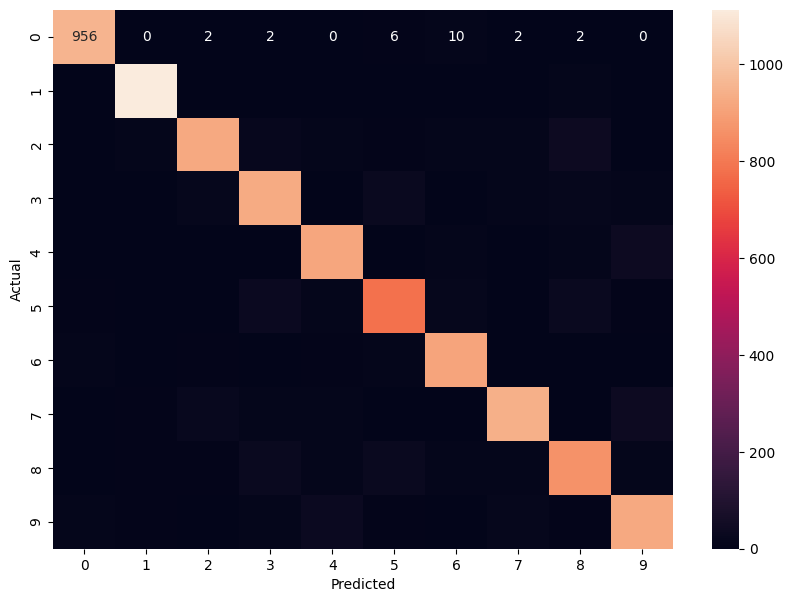

In [23]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

When we use a flatten layer we don't have to call .reshape on input dataset.This time we will use relu activation

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2761 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1275 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0898 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0685 - accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0539 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0778 - accuracy: 0.9775


[0.07779648900032043, 0.9775000214576721]

In [26]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,   10,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,   10,  923,   19,    9,    5,   13,   10,   35,    4],
       [   0,    0,   17,  929,    1,   27,    2,   10,   15,    9],
       [   1,    1,    2,    1,  916,    0,   13,    3,   10,   35],
       [   8,    3,    2,   33,    9,  780,   16,    4,   30,    7],
       [  10,    3,    5,    1,    8,   13,  913,    2,    3,    0],
       [   1,    6,   23,    9,   10,    0,    0,  940,    2,   37],
       [   4,    8,    7,   28,    9,   28,    9,    9,  862,   10],
       [  10,    7,    1,    9,   32,    8,    0,   15,    5,  922]])>

Text(95.72222222222221, 0.5, 'Truth')

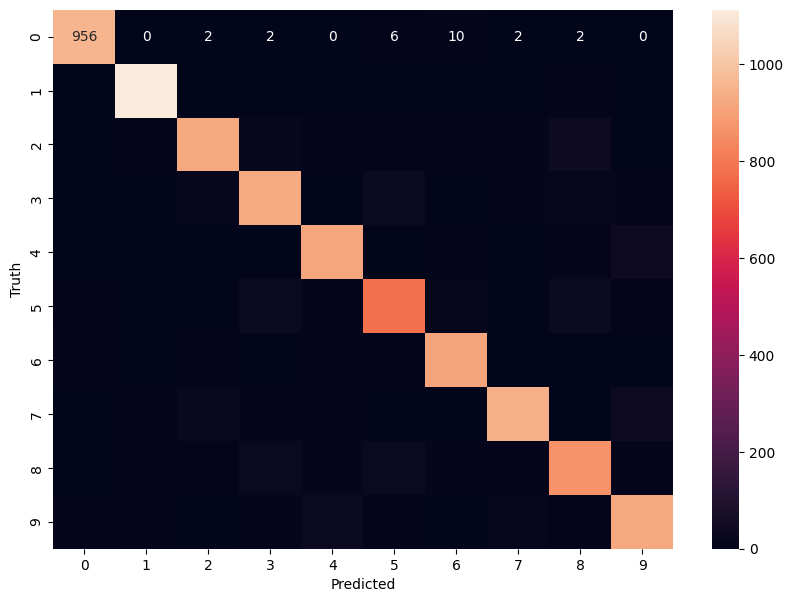

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')